5 проект

In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=8e47abd49b51e9ee989715fb11b8aacea9430fd491999b4e037f6bee532a3a6e
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


устанавливаем библиотеки

In [2]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import count_distinct
from pyspark.sql.functions import count
from pyspark.sql.functions import round
from pyspark.sql.functions import sum
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

читаем данные из CSV

In [3]:
df = pd.read_csv('yellow_tripdata_2020-01.csv', sep=',', index_col=False, dtype='unicode', encoding = 'UTF8')

In [5]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.20,1,N,238,239,1,6,3,0.5,1.47,0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.20,1,N,239,238,1,7,3,0.5,1.5,0,0.3,12.3,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,.60,1,N,238,238,1,6,3,0.5,1,0,0.3,10.8,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,.80,1,N,238,151,1,5.5,0.5,0.5,1.36,0,0.3,8.16,0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,.00,1,N,193,193,2,3.5,0.5,0.5,0,0,0.3,4.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113392,2,2020-01-01 15:52:57,2020-01-01 15:59:41,1,1.04,1,N,236,237,1,6.5,0,0.5,0.03,0,0.3,9.83,2.5
113393,2,2020-01-01 15:22:13,2020-01-01 15:56:34,1,17.97,2,N,230,132,1,52,0,0.5,12.28,6.12,0.3,73.7,2.5
113394,2,2020-01-01 15:18:54,2020-01-01 15:23:50,1,.89,1,N,100,246,1,5.5,0,0.5,1.76,0,0.3,10.56,2.5
113395,2,2020-01-01 15:28:01,2020-01-01 15:40:29,1,1.04,1,N,50,161,2,9,0,0.5,0,0,0.3,12.3,2.5


In [7]:
df.shape

(113397, 18)

In [8]:
for i in df.columns: #возвращает список всех столбцов (в виде столбца)
    print (i)

VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
trip_distance
RatecodeID
store_and_fwd_flag
PULocationID
DOLocationID
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge


In [9]:
df.index

RangeIndex(start=0, stop=113397, step=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113397 entries, 0 to 113396
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   VendorID               113397 non-null  object
 1   tpep_pickup_datetime   113397 non-null  object
 2   tpep_dropoff_datetime  113397 non-null  object
 3   passenger_count        113397 non-null  object
 4   trip_distance          113397 non-null  object
 5   RatecodeID             113396 non-null  object
 6   store_and_fwd_flag     113396 non-null  object
 7   PULocationID           113396 non-null  object
 8   DOLocationID           113396 non-null  object
 9   payment_type           113396 non-null  object
 10  fare_amount            113396 non-null  object
 11  extra                  113396 non-null  object
 12  mta_tax                113396 non-null  object
 13  tip_amount             113396 non-null  object
 14  tolls_amount           113396 non-null  object
 15  

In [11]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,113397,113397,113397,113397,113397,113396,113396,113396,113396,113396,113396,113396,113396,113396,113396,113396,113396,113396
unique,2,44210,45050,10,2413,6,2,212,253,4,463,11,4,1296,139,3,3002,5
top,2,2020-01-01 01:53:04,2020-01-02 00:00:00,1,.80,1,N,79,79,1,6,0.5,0.5,0,0,0.3,9.8,2.5
freq,79590,13,35,72417,1550,108862,112269,5251,3575,73706,5607,42923,111576,43122,107476,112851,2518,101001


Возвращаем новый датафрейм, в котором значения NaN заполнены константой - нулями

In [12]:
filled = df.fillna(0)

In [14]:
filled.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,113397,113397,113397,113397,113397,113397,113397,113397,113397,113397,113397,113397,113397,113397,113397,113397,113397,113397
unique,2,44210,45050,10,2413,7,3,213,254,5,464,12,5,1297,140,4,3003,6
top,2,2020-01-01 01:53:04,2020-01-02 00:00:00,1,.80,1,N,79,79,1,6,0.5,0.5,0,0,0.3,9.8,2.5
freq,79590,13,35,72417,1550,108862,112269,5251,3575,73706,5607,42923,111576,43122,107476,112851,2518,101001


Объект Dataframe можно сортировать по значениям в одном или нескольких столбцах. Для этого имена столбцов следует передать в качестве значения параметра "by" метода sort_values. По умолчанию данные сортируются в порядке возрастания, но можно отсортировать и в порядке убывания. Используем параметр ascending.

In [17]:
filled.sort_values('tpep_pickup_datetime')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
91358,2,2009-01-01 00:17:41,2009-01-01 00:51:18,5,17.74,2,N,164,132,2,52,0,0.5,0,6.12,0.3,61.42,2.5
107422,2,2009-01-01 00:48:28,2009-01-01 00:57:48,1,.93,1,N,100,186,2,7.5,0,0.5,0,0,0.3,10.8,2.5
99910,2,2009-01-01 00:52:20,2009-01-01 00:59:07,5,2.12,1,N,132,132,2,8.5,0,0.5,0,0,0.3,9.3,0
7,2,2019-12-18 15:27:49,2019-12-18 15:28:59,1,.00,5,N,193,193,1,0.01,0,0,0,0,0.3,2.81,2.5
8,2,2019-12-18 15:30:35,2019-12-18 15:31:35,4,.00,1,N,193,193,1,2.5,0.5,0.5,0,0,0.3,6.3,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69873,2,2020-01-01 19:13:58,2020-01-01 19:30:10,4,3.08,1,N,261,186,2,13.5,0,0.5,0,0,0.3,16.8,2.5
74110,2,2020-01-01 20:39:25,2020-01-01 20:46:12,4,1.23,1,N,261,125,2,6.5,0,0.5,0,0,0.3,9.8,2.5
74111,2,2020-01-01 20:52:23,2020-01-01 21:21:02,4,7.31,1,N,114,42,1,24,0,0.5,3,0,0.3,30.3,2.5
80029,2,2020-01-01 21:56:01,2020-01-01 22:06:10,4,1.92,1,N,239,50,1,9,0,0.5,3.08,0,0.3,15.38,2.5


In [20]:
filled[['fare_amount', 'passenger_count']].groupby('passenger_count').median()

,fare_amount
passenger_count,
0,9.5
1,9.5
2,10.0
3,9.5
4,10.0
5,9.5
6,9.5
7,70.0
8,58.0


Создаем Spark-сессии

In [22]:
spark = SparkSession.builder\
    .master("local[*]")\
    .appName("SparkFirst")\
    .config("spark.executor.memory", "10g")\
    .config("spark.executor.cores", 5)\
    .config("spark.dynamicAllocation.enabled", "true")\
    .config("spark.dynamicAllocation.maxExecutors", 5)\
    .config("spark.shuffle.service.enabled", "true")\
.getOrCreate()

In [25]:
table = StructType([
    StructField("VendorID", IntegerType(), True),
    StructField("tpep_pickup_datetime", TimestampNTZType(), True),
    StructField("tpep_dropoff_datetime", TimestampNTZType(), True),
    StructField("passenger_count",IntegerType(), True),
    StructField("trip_distance", DoubleType(), True),
    StructField("RatecodeID", IntegerType(), True),
    StructField("store_and_fwd_flag",StringType(), True),
    StructField("PULocationID",IntegerType(), True),
    StructField("DOLocationID",IntegerType(), True),
    StructField("payment_type",IntegerType(), True),
    StructField("fare_amount",DoubleType(), True),
    StructField("extra",DoubleType(), True),
    StructField("mta_tax",FloatType(), True),
    StructField("tip_amount",DoubleType(), True),
    StructField("tolls_amount",DoubleType(), True),
    StructField("improvement_surcharge",FloatType(), True),
    StructField("total_amount",DoubleType(), True),
    StructField("congestion_surcharge",FloatType(), True) ])

In [27]:
df_spark = spark.read.csv('yellow_tripdata_2020-01.csv', header=True, schema=table)

In [29]:
df_spark.show(10)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       1| 2020-01-01 00:28:15|  2020-01-01 00:33:03|              1|          1.2|         1|                 N|         238|         239|           1|        6.0|  3.0|    0.5|      1.47|         0.0|                  0.3

In [30]:
df_spark.dtypes

[('VendorID', 'int'),
 ('tpep_pickup_datetime', 'timestamp_ntz'),
 ('tpep_dropoff_datetime', 'timestamp_ntz'),
 ('passenger_count', 'int'),
 ('trip_distance', 'double'),
 ('RatecodeID', 'int'),
 ('store_and_fwd_flag', 'string'),
 ('PULocationID', 'int'),
 ('DOLocationID', 'int'),
 ('payment_type', 'int'),
 ('fare_amount', 'double'),
 ('extra', 'double'),
 ('mta_tax', 'float'),
 ('tip_amount', 'double'),
 ('tolls_amount', 'double'),
 ('improvement_surcharge', 'float'),
 ('total_amount', 'double'),
 ('congestion_surcharge', 'float')]

Распечаем схему данные в древовидном форме

In [31]:
df_spark.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: float (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: float (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: float (nullable = true)



Очищаем записи от нулевых и пустых значений

In [32]:
# Создаем функцию
def my_count(df_in):
    df_in.agg(*[count(c).alias(c) for c in df_in.columns]).show()
#Очищаем записи
df_dropna = df_spark.dropna(how='any')
my_count(df_dropna)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-------+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|  extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-------+-------+----------+------------+---------------------+------------+--------------------+
| 3756770|             3756770|              3756770|        3756770|      3756770|   3756770|           3756770|     3756770|     3756770|     3756770|    3756770|3756770|3756770|   3756770|     3756770|             

Глянем на описательную статистику

In [33]:
df_dropna.select('passenger_count','total_amount', 'trip_distance','fare_amount','tip_amount','congestion_surcharge').summary().show()

+-------+------------------+------------------+------------------+------------------+------------------+--------------------+
|summary|   passenger_count|      total_amount|     trip_distance|       fare_amount|        tip_amount|congestion_surcharge|
+-------+------------------+------------------+------------------+------------------+------------------+--------------------+
|  count|           3756770|           3756770|           3756770|           3756770|           3756770|             3756770|
|   mean|1.5288716104525963|18.458252123703403|2.8875730428000868|12.525878145320904|2.1778366948204866|  2.2919671020584174|
| stddev|1.1579065534237332|14.699449135769722|3.8171942738947813|12.012215175206183|2.7268500984914983|  0.7122062445644731|
|    min|                 0|           -1242.3|            -22.18|           -1238.0|             -91.0|                -2.5|
|    25%|                 1|             11.16|              0.97|               6.5|               0.0|              

медианное значение для пассажиров 1.5\
медианное значение для сумма 18\
медианное дистанция 2.8\
медианное чаевые 2.19 \

---

Есть минимальные значения с отрицательной суммой, чаеевыми, дистанцией (вероятно отказы или отмены) \



In [34]:
df_dropna.createOrReplaceTempView("trip_tax")

In [35]:
sql_spark_Total_amount = """
  select
    count(Total_amount)
  from trip_tax
    where Total_amount<0
"""
df_Total_amount = spark.sql(sql_spark_Total_amount)
df_Total_amount.show()

+-------------------+
|count(Total_amount)|
+-------------------+
|              11581|
+-------------------+



In [36]:
sql_spark_Tip_amount = """
  select
    count(Tip_amount)
  from trip_tax
    where Tip_amount<0
"""
df_Tip_amount = spark.sql(sql_spark_Tip_amount)
df_Tip_amount.show()

+-----------------+
|count(Tip_amount)|
+-----------------+
|              110|
+-----------------+



In [40]:
# проверим данные за '2020-01-01'
sql = """
select date(tpep_pickup_datetime) as date,
Total_amount,
trip_distance,
tip_amount,
tpep_pickup_datetime,
tpep_dropoff_datetime,
passenger_count
from trip_tax
where date(tpep_pickup_datetime) ='2020-01-01'
"""
df_proverka = spark.sql(sql)
df_proverka.createOrReplaceTempView('date')
df_proverka.show(50)

+----------+------------+-------------+----------+--------------------+---------------------+---------------+
|      date|Total_amount|trip_distance|tip_amount|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|
+----------+------------+-------------+----------+--------------------+---------------------+---------------+
|2020-01-01|       11.27|          1.2|      1.47| 2020-01-01 00:28:15|  2020-01-01 00:33:03|              1|
|2020-01-01|        12.3|          1.2|       1.5| 2020-01-01 00:35:39|  2020-01-01 00:43:04|              1|
|2020-01-01|        10.8|          0.6|       1.0| 2020-01-01 00:47:41|  2020-01-01 00:53:52|              1|
|2020-01-01|        8.16|          0.8|      1.36| 2020-01-01 00:55:23|  2020-01-01 01:00:14|              1|
|2020-01-01|         4.8|          0.0|       0.0| 2020-01-01 00:01:58|  2020-01-01 00:04:16|              1|
|2020-01-01|         3.8|         0.03|       0.0| 2020-01-01 00:09:44|  2020-01-01 00:10:37|              1|
|2020-01-0

In [46]:
# Датафрейм c выбрасами
sql = """ with cte1 as (
select tpep_pickup_datetime as cte1_start_date,
tpep_dropoff_datetime as cte1_end_date
from trip_tax
where Total_amount < 0)

select date(tpep_pickup_datetime) as date,
Total_amount,
passenger_count,
trip_distance,
tip_amount,
tpep_pickup_datetime,
tpep_dropoff_datetime,
cte1_start_date,
cte1_end_date
from trip_tax trip
    left join cte1
on cte1.cte1_start_date = trip.tpep_pickup_datetime
and cte1.cte1_end_date = trip.tpep_dropoff_datetime
where cte1.cte1_start_date is not null
"""
cte1 = spark.sql(sql)
cte1.createOrReplaceTempView('date')
cte1.show(100);

+----------+------------+---------------+-------------+----------+--------------------+---------------------+-------------------+-------------------+
|      date|Total_amount|passenger_count|trip_distance|tip_amount|tpep_pickup_datetime|tpep_dropoff_datetime|    cte1_start_date|      cte1_end_date|
+----------+------------+---------------+-------------+----------+--------------------+---------------------+-------------------+-------------------+
|2020-01-01|        -6.8|              1|         0.11|       0.0| 2020-01-01 01:41:32|  2020-01-01 01:43:05|2020-01-01 01:41:32|2020-01-01 01:43:05|
|2020-01-01|         6.8|              1|         0.11|       0.0| 2020-01-01 01:41:32|  2020-01-01 01:43:05|2020-01-01 01:41:32|2020-01-01 01:43:05|
|2020-01-01|        -9.8|              1|         0.36|       0.0| 2020-01-01 03:28:33|  2020-01-01 03:35:27|2020-01-01 03:28:33|2020-01-01 03:35:27|
|2020-01-01|         9.8|              1|         0.36|       0.0| 2020-01-01 03:28:33|  2020-01-01 

есть зеркальные записи с отрицательными значениями. Это вероятно, отмененые заказы

In [47]:
# Датафрейм включая сторнированные операции
sql = """ with storno as (
select tpep_pickup_datetime as storno_start_date, tpep_dropoff_datetime as storno_end_date from trip_tax
where Total_amount < 0)
select date(tpep_pickup_datetime) as date, Total_amount, passenger_count, trip_distance, tip_amount, tpep_pickup_datetime, tpep_dropoff_datetime,
       storno_start_date, storno_end_date
from trip_tax
left join storno
on storno.storno_start_date = trip_tax.tpep_pickup_datetime
and storno.storno_end_date = trip_tax.tpep_dropoff_datetime

"""
storno = spark.sql(sql)
storno.createOrReplaceTempView('date')
storno.show(200);


+----------+------------+---------------+-------------+----------+--------------------+---------------------+-------------------+-------------------+
|      date|Total_amount|passenger_count|trip_distance|tip_amount|tpep_pickup_datetime|tpep_dropoff_datetime|  storno_start_date|    storno_end_date|
+----------+------------+---------------+-------------+----------+--------------------+---------------------+-------------------+-------------------+
|2020-01-01|       10.55|              1|          0.5|      1.75| 2020-01-01 00:08:29|  2020-01-01 00:13:20|               null|               null|
|2020-01-01|       10.56|              4|         0.66|      1.76| 2020-01-01 00:42:23|  2020-01-01 00:47:08|               null|               null|
|2020-01-01|       12.35|              1|          0.7|      2.05| 2020-01-01 00:47:27|  2020-01-01 00:55:40|               null|               null|
|2020-01-01|       12.95|              1|          1.0|      2.15| 2020-01-01 00:59:30|  2020-01-01 

In [48]:
storno.createOrReplaceTempView("storno")

In [50]:
# создание датафрейма без сторнированных операций
sql = """
select without_storno.date, without_storno.Total_amount, without_storno.passenger_count, without_storno.trip_distance,
       without_storno.tip_amount
from
        (select distinct day_trips.date, day_trips.Total_amount,
               case
                   when tpep_pickup_datetime = storno_start_date  and tpep_dropoff_datetime = storno_end_date then 1
                   ELSE 0
               end as storno_flag,
               passenger_count, trip_distance, tip_amount, tpep_pickup_datetime,
               tpep_dropoff_datetime, storno_start_date, storno_end_date
               from
                   (select date(tpep_pickup_datetime) as date, Total_amount, passenger_count, tpep_pickup_datetime,
                   tpep_dropoff_datetime, storno_start_date, storno_end_date, trip_distance, tip_amount
                   from storno
                   order by date) as day_trips
        ) as without_storno
where storno_flag = 0
"""
without_storno = spark.sql(sql)
without_storno.createOrReplaceTempView('date')
without_storno.show(100);

+----------+------------+---------------+-------------+----------+
|      date|Total_amount|passenger_count|trip_distance|tip_amount|
+----------+------------+---------------+-------------+----------+
|2020-01-01|       10.55|              1|          0.5|      1.75|
|2020-01-01|        11.8|              1|          1.2|       0.0|
|2020-01-01|         7.8|              1|          0.4|       0.0|
|2020-01-01|       15.38|              1|         1.23|      3.08|
|2020-01-01|       31.56|              1|         6.53|      5.26|
|2020-01-01|       14.16|              2|         1.28|      2.36|
|2020-01-01|        23.3|              1|          4.0|       0.0|
|2020-01-01|         6.3|              1|         0.01|       0.0|
|2020-01-01|        13.8|              4|         1.35|       2.0|
|2020-01-01|         7.3|              1|         0.28|       0.0|
|2020-01-01|       31.56|              3|         6.74|      5.26|
|2020-01-01|       10.56|              1|         1.52|      1

In [51]:
without_storno.createOrReplaceTempView("without_storno")

In [55]:
# проверка данных, имеющих отрицательное значение пройденной дистанции ('trip_amount')
sql = """
select * from trip_tax
where trip_distance < 0
limit 5
"""
proverka = spark.sql(sql)
proverka.createOrReplaceTempView('date')
proverka.show();

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       2| 2020-01-02 17:43:57|  2020-01-02 17:49:48|              1|        -0.88|         5|                 N|           7|         193|           1|        8.2|  0.0|    0.5|       1.8|         0.0|                  0.3

необходимо очистить данные от отрицаетльных значений в дистаннции

In [56]:
# проверка данных, имеющих отрицательное значение чаевых ('tip_amount')
sql = """
select * from trip_tax
where tip_amount < 0
limit 5
"""
proverka = spark.sql(sql)
proverka.createOrReplaceTempView('date')
proverka.show();

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       2| 2020-01-01 01:08:14|  2020-01-01 01:10:14|              2|         0.24|         1|                 N|          42|          42|           4|       -3.5| -0.5|   -0.5|      -0.8|         0.0|                 -0.3

In [57]:
sql = """
select * from trip_tax
where tpep_pickup_datetime in ('2020-01-01 01:08:14', '2020-01-01 12:49:36')
AND trip_distance in (0.24, 0.0)
limit 5
"""
proverka2 = spark.sql(sql)
proverka2.createOrReplaceTempView('date')
proverka2.show(5);

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       2| 2020-01-01 01:08:14|  2020-01-01 01:10:14|              2|         0.24|         1|                 N|          42|          42|           4|       -3.5| -0.5|   -0.5|      -0.8|         0.0|                 -0.3

нужно убрать данные с отрицательным значением и в чаевых

In [59]:
# Рассчитаем процент поездок для каждого дня по количеству человек в машине.
# Также определим самую дешевую и дорогую поездку для каждой группы
sql = """
select distinct percent_count.date,
sum(case when percent_count.passenger_count = 0 then percent_count.percent_per_passenger else 0 end) as percentage_zero,
sum(case when percent_count.passenger_count = 1 then percent_count.percent_per_passenger else 0 end) as pecentage_1p,
sum(case when percent_count.passenger_count = 2 then percent_count.percent_per_passenger else 0 end) as percentage_2p,
sum(case when percent_count.passenger_count = 3 then percent_count.percent_per_passenger else 0 end) as percentage_3p,
sum(case when percent_count.passenger_count > 3 then percent_count.percent_per_passenger else 0 end) as percentage_4p_plus,
sum(case when percent_count.passenger_count = 0 then percent_count.max_Total_amount else 0 end) as max_amount_perc_zero,
sum(case when percent_count.passenger_count = 0 then percent_count.min_Total_amount else 0 end) as min_amount_perc_zero,
sum(case when percent_count.passenger_count = 1 then percent_count.max_Total_amount else 0 end) as max_amount_perc_1p,
sum(case when percent_count.passenger_count = 1 then percent_count.min_Total_amount else 0 end) as min_amount_perc_1p,
sum(case when percent_count.passenger_count = 2 then percent_count.max_Total_amount else 0 end) as max_amount_perc_2p,
sum(case when percent_count.passenger_count = 2 then percent_count.min_Total_amount else 0 end) as min_amount_perc_2p,
sum(case when percent_count.passenger_count = 3 then percent_count.max_Total_amount else 0 end) as max_amount_perc_3p,
sum(case when percent_count.passenger_count = 3 then percent_count.min_Total_amount else 0 end) as min_amount_perc_3p,
sum(case when percent_count.passenger_count > 3 then percent_count.max_Total_amount else 0 end) as max_amount_perc_4p_plus,
sum(case when percent_count.passenger_count > 3 then percent_count.min_Total_amount else 0 end) as min_amount_perc_4p_plus
from
    (select distinct date, passenger_count,
    round((count(passenger_count) over (partition by date, passenger_count))*100/(count(date) over (partition by date)),0) as percent_per_passenger,
    max(Total_amount) over (partition by date, passenger_count) as max_Total_amount,
    min(Total_amount) over (partition by date, passenger_count) as min_Total_amount
    from without_storno
    where trip_distance > 0
    ) as percent_count
group by percent_count.date
order by percent_count.date


"""
itog1 = spark.sql(sql)
itog1.createOrReplaceTempView('date')
itog1.show(10);

+----------+---------------+------------+-------------+-------------+------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------------+-----------------------+
|      date|percentage_zero|pecentage_1p|percentage_2p|percentage_3p|percentage_4p_plus|max_amount_perc_zero|min_amount_perc_zero|max_amount_perc_1p|min_amount_perc_1p|max_amount_perc_2p|min_amount_perc_2p|max_amount_perc_3p|min_amount_perc_3p|max_amount_perc_4p_plus|min_amount_perc_4p_plus|
+----------+---------------+------------+-------------+-------------+------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------------+-----------------------+
|2008-12-31|            0.0|        75.0|          0.0|         13.0|              13.0|                 0.0|            

In [61]:
# Запись полученного результата в файл
df_final = itog1.toPandas()
df_final.head(10)

,date,percentage_zero,pecentage_1p,percentage_2p,percentage_3p,percentage_4p_plus,max_amount_perc_zero,min_amount_perc_zero,max_amount_perc_1p,min_amount_perc_1p,max_amount_perc_2p,min_amount_perc_2p,max_amount_perc_3p,min_amount_perc_3p,max_amount_perc_4p_plus,min_amount_perc_4p_plus
0,2008-12-31,0.0,75.0,0.0,13.0,13.0,0.00,0.0,73.70,7.3,0.00,0.0,7.25,7.25,55.30,55.30
1,2009-01-01,0.0,67.0,11.0,0.0,22.0,0.00,0.0,74.80,8.3,31.30,31.3,0.00,0.00,61.42,9.30
2,2019-12-31,0.0,58.0,15.0,5.0,22.0,0.00,0.0,71.62,5.8,41.80,5.8,34.42,10.56,81.46,23.40
3,2020-01-01,2.0,63.0,20.0,6.0,9.0,145.55,0.3,465.30,0.0,281.42,0.3,433.04,0.31,729.08,78.32
4,2020-01-02,2.0,69.0,16.0,5.0,9.0,162.42,0.3,390.96,0.0,210.65,0.0,215.54,0.30,958.64,11.40
5,2020-01-03,2.0,69.0,16.0,5.0,9.0,187.42,0.3,482.92,0.0,370.30,0.0,409.59,3.80,612.30,78.34
6,2020-01-04,2.0,66.0,18.0,5.0,9.0,152.54,0.3,965.80,0.0,481.30,0.0,158.80,0.30,951.53,89.32
7,2020-01-05,2.0,68.0,17.0,5.0,9.0,435.42,0.3,596.42,0.0,375.30,0.0,333.34,0.00,658.42,100.26
8,2020-01-06,2.0,74.0,14.0,4.0,7.0,275.42,0.3,581.06,0.0,276.36,0.3,200.30,3.30,555.33,119.75
9,2020-01-07,2.0,74.0,14.0,3.0,7.0,114.80,0.0,410.67,0.0,312.96,0.0,225.30,0.00,602.90,10.85


In [62]:
df_final.to_parquet('result.parquet', index = None)

Aнализ размера чаевых

In [63]:
without_storno.createOrReplaceTempView("without_storno")

In [64]:
# Выберем интересующие столбцы. Рассматриваем только поездки с положительным значением пройденной дистанции
sql = """
select passenger_count, trip_distance, tip_amount
from without_storno
where trip_distance > 0

"""
itog3 = spark.sql(sql)
itog3.createOrReplaceTempView('date')
itog3.show(5);

+---------------+-------------+----------+
|passenger_count|trip_distance|tip_amount|
+---------------+-------------+----------+
|              1|          0.5|      1.75|
|              1|          1.2|       0.0|
|              1|          0.4|       0.0|
|              1|         1.23|      3.08|
|              1|         6.53|      5.26|
+---------------+-------------+----------+
only showing top 5 rows



In [65]:
itog3_pandas = itog3.toPandas()

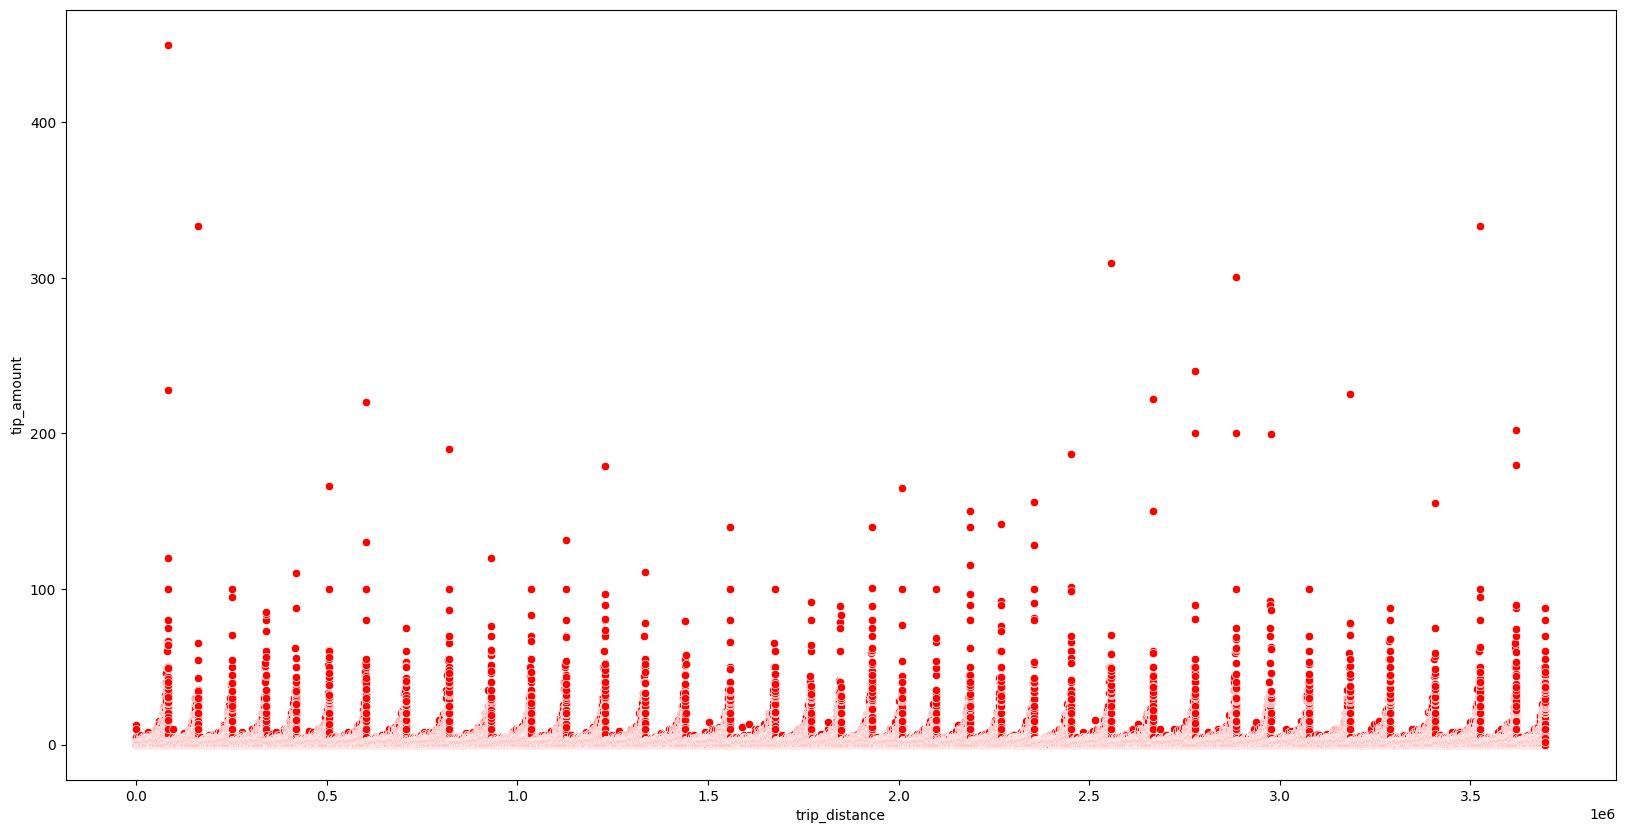

In [66]:
# найдем выбросы в целевой переменной tip_amount.
# построим диаграмму рассеивания
tip_amount = itog3_pandas['tip_amount']
trip_distance = itog3_pandas['trip_distance']
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x= trip_distance.index, y=tip_amount, ax=ax, color='red')
ax.set_xlabel('trip_distance')
ax.set_ylabel('tip_amount');

на диаграмме видно, что видно не большое кол-во выбросов. Кроме того видно,что есть зависомотсть между параметрами и размер часовых клиенты оценивают соразмерно расстоянию поездки

Очитска от выбросов

In [67]:
itog3.select('passenger_count', 'trip_distance', 'tip_amount').summary().show()

+-------+------------------+------------------+------------------+
|summary|   passenger_count|     trip_distance|        tip_amount|
+-------+------------------+------------------+------------------+
|  count|           3696360|           3696360|           3696360|
|   mean|1.5321278230475386|2.9238342883267645|2.1807482442173756|
| stddev|1.1614380779521016|3.8262265312471153|2.6569366210015484|
|    min|                 0|              0.01|               0.0|
|    25%|                 1|               1.0|               0.0|
|    50%|                 1|              1.61|              1.95|
|    75%|                 2|              2.95|              2.86|
|    max|                 9|            262.88|             450.0|
+-------+------------------+------------------+------------------+



<ipython-input-68-6d2f033ded61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(itog3_pandas.tip_amount)


<Axes: xlabel='tip_amount', ylabel='Density'>

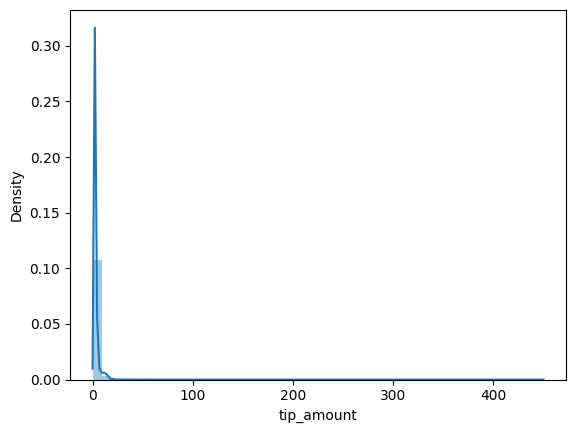

In [68]:
# Построим гистограмму распределения чаевых
sns.distplot(itog3_pandas.tip_amount)

<ipython-input-69-d6d7de793501>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(itog3_pandas.trip_distance)


<Axes: xlabel='trip_distance', ylabel='Density'>

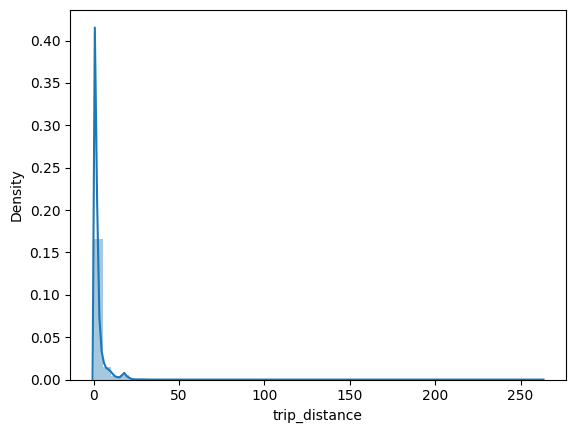

In [69]:
# Построим гистограмму распределения пройденного расстояния
sns.distplot(itog3_pandas.trip_distance)

<Axes: xlabel='passenger_count', ylabel='count'>

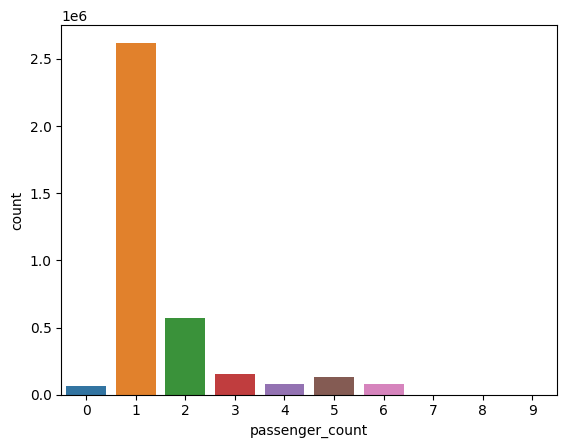

In [70]:
# Посмотрим распределение поездок по количеству пассажиров
sns.countplot(x='passenger_count', data = itog3_pandas)

In [71]:
# среднее значение
mean = itog3_pandas.mean()
mean

passenger_count    1.532128
trip_distance      2.923834
tip_amount         2.180748
dtype: float64

In [72]:
# стандартное отклонение
res_std = itog3_pandas.std()
res_std

passenger_count    1.161438
trip_distance      3.826227
tip_amount         2.656937
dtype: float64

In [73]:
print('среднее значение чаевых при количестве пассажиров:')
print('  0     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 0, 'tip_amount'].mean())
print('  1     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 1, 'tip_amount'].mean())
print('  2     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 2, 'tip_amount'].mean())
print('  3     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 3, 'tip_amount'].mean())
print('  4     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 4, 'tip_amount'].mean())
print('  5     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 5, 'tip_amount'].mean())
print('  6     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 6, 'tip_amount'].mean())

среднее значение чаевых при количестве пассажиров:
  0      2.07257689825769
  1      2.1858441002294597
  2      2.2022727624121066
  3      2.122916462446331
  4      2.00815964180948
  5      2.1932913192667733
  6      2.2048748469075323


In [74]:
print('стандартное отклонение по значению чаевых при количестве пассажиров:')
print('  0     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 0, 'tip_amount'].std())
print('  1     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 1, 'tip_amount'].std())
print('  2     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 2, 'tip_amount'].std())
print('  3     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 3, 'tip_amount'].std())
print('  4     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 4, 'tip_amount'].std())
print('  5     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 5, 'tip_amount'].std())
print('  6     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 6, 'tip_amount'].std())

стандартное отклонение по значению чаевых при количестве пассажиров:
  0      2.9947063140981847
  1      2.6139848377106665
  2      2.726933530542875
  3      2.830303521080831
  4      2.7745244950080994
  5      2.5487436990879986
  6      2.947880568137039


In [75]:
print('среднее значение пройденного расстояния при количестве пассажиров:')
print('  0     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 0, 'trip_distance'].mean())
print('  1     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 1, 'trip_distance'].mean())
print('  2     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 2, 'trip_distance'].mean())
print('  3     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 3, 'trip_distance'].mean())
print('  4     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 4, 'trip_distance'].mean())
print('  5     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 5, 'trip_distance'].mean())
print('  6     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 6, 'trip_distance'].mean())

среднее значение пройденного расстояния при количестве пассажиров:
  0      2.778545309283102
  1      2.8812105372837653
  2      3.084004378366791
  3      3.0109092869606138
  4      3.096066723277237
  5      2.9182813111398733
  6      2.9734512145335783


In [76]:
print('стандартное отклонение по значению пройденного расстояния при количестве пассажиров:')
print('  0     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 0, 'trip_distance'].std())
print('  1     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 1, 'trip_distance'].std())
print('  2     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 2, 'trip_distance'].std())
print('  3     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 3, 'trip_distance'].std())
print('  4     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 4, 'trip_distance'].std())
print('  5     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 5, 'trip_distance'].std())
print('  6     ', itog3_pandas.loc[itog3_pandas['passenger_count'] == 6, 'trip_distance'].std())

стандартное отклонение по значению пройденного расстояния при количестве пассажиров:
  0      3.734656707338689
  1      3.758991721284411
  2      4.051159620980434
  3      3.971009437662518
  4      4.291108845771185
  5      3.707456011765162
  6      3.8259913913792576


Среднее значение чаевых и пройденного расстояния в зависимости от количества пассажиров имеет незначительно влияние

In [77]:
low_limit_tip = 0
above_limit_tip = 15
low_limit_trip = 0.01
above_limit_trip = 20
above_limit_pass = 6

itog3_filtered1 = itog3_pandas[(itog3_pandas.tip_amount >= low_limit_tip) & (itog3_pandas.tip_amount <= above_limit_tip)]
itog3_filtered2 = itog3_filtered1[(itog3_filtered1.trip_distance >= low_limit_trip) & (itog3_filtered1.trip_distance <= above_limit_trip)]
itog3_filtered = itog3_filtered2[(itog3_filtered2.passenger_count <= above_limit_pass)]

In [79]:

print('--pазмер чаевых, долл:')
print('   - минимальное значение:', low_limit_tip)
print('   - максимальное значение:', above_limit_tip)
print('--пройденное расстояние, км.:')
print('   - минимальное значение:', low_limit_trip)
print('   - максимальное значение:', above_limit_trip)
print('--максимальное количество пассажиров для анализа, чел.:', above_limit_pass)

--pазмер чаевых, долл:
   - минимальное значение: 0
   - максимальное значение: 15
--пройденное расстояние, км.:
   - минимальное значение: 0.01
   - максимальное значение: 20
--максимальное количество пассажиров для анализа, чел.: 6


In [81]:
outliers1 = itog3_pandas[(itog3_pandas.tip_amount > above_limit_tip)]
outliers1.count()

passenger_count    15674
trip_distance      15674
tip_amount         15674
dtype: int64

In [82]:
outliers2 = itog3_filtered1[(itog3_filtered1.trip_distance > above_limit_trip)]

In [83]:
outliers2.count()

passenger_count    21632
trip_distance      21632
tip_amount         21632
dtype: int64

In [84]:
outliers3 = itog3_filtered2[(itog3_filtered2.passenger_count > above_limit_pass)]
outliers3.count()

passenger_count    17
trip_distance      17
tip_amount         17
dtype: int64

In [85]:
outliers = pd.concat([outliers1, outliers2, outliers3], ignore_index = True)

In [86]:
# Рассчитаем % удаленного датасета
outliers['passenger_count'].count()*100/itog3_pandas['passenger_count'].count().round(2)

1.0097230789208844

Удалено 1% значений.

Проверка удаленных значений

In [87]:
outliers_groups_sum = outliers.groupby(['passenger_count']).mean().round(2)

In [88]:
outliers_groups_sum

,trip_distance,tip_amount
passenger_count,,
0,20.47,13.79
1,20.80,12.31
2,20.51,11.73
3,20.98,12.39
4,21.89,11.86
5,20.35,12.19
6,20.20,12.92
7,6.25,8.59
8,8.38,7.50


In [89]:
outliers_groups_count = outliers.groupby(['passenger_count']).count().round(2)
outliers_groups_count

,trip_distance,tip_amount
passenger_count,,
0,598,598
1,25315,25315
2,6698,6698
3,1730,1730
4,933,933
5,1265,1265
6,761,761
7,10,10
8,6,6


Так процент удаленных значений из датасета 1 процент. Данные значение не повлияли значительно на анализ

Анализ зависимости размера чаевых на очищенных данных

In [90]:
# Рассмотрим очищенный датасет
itog3_filtered

,passenger_count,trip_distance,tip_amount
0,1,0.42,0.00
1,1,2.34,0.00
2,1,5.27,0.00
3,1,18.82,12.28
4,1,0.85,0.00
...,...,...,...
3696338,2,3.44,0.00
3696343,1,12.30,10.00
3696357,3,1.17,0.00
3696358,3,6.29,4.00


Построим гистограмму распределения чаевых

<ipython-input-91-3983eaafa0a0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(itog3_filtered.tip_amount)


<Axes: xlabel='tip_amount', ylabel='Density'>

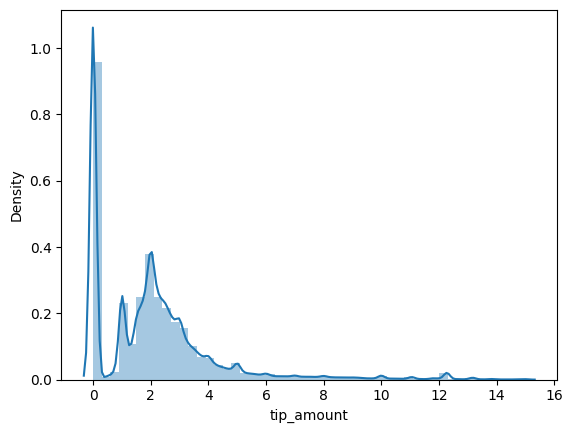

In [91]:

sns.distplot(itog3_filtered.tip_amount)

Построим гистограмму распределения пройденной дистанции

<ipython-input-92-3cbc785b5ac1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(itog3_filtered.trip_distance)


<Axes: xlabel='trip_distance', ylabel='Density'>

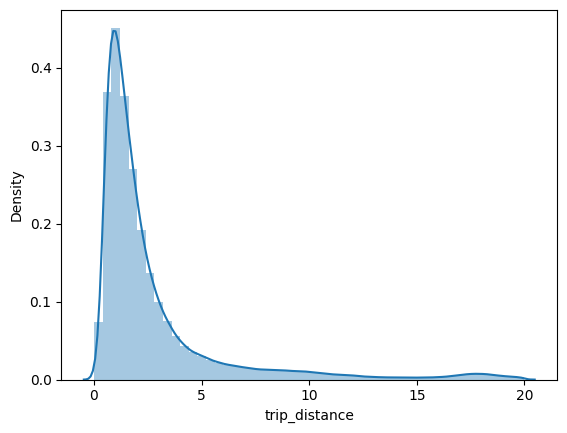

In [92]:

sns.distplot(itog3_filtered.trip_distance)

Анализируемые группы пассажиров от 0 до 6и человек.


<Axes: xlabel='passenger_count', ylabel='count'>

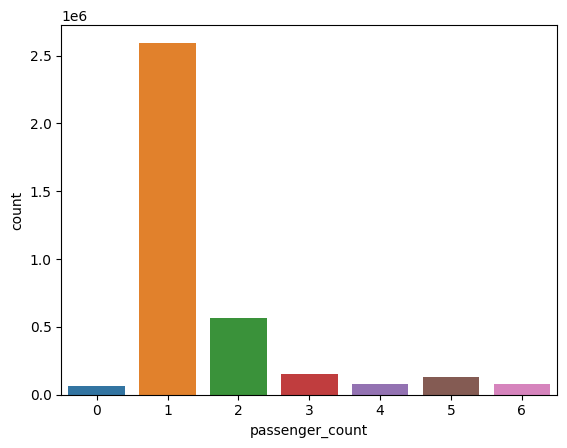

In [93]:
sns.countplot(x='passenger_count', data = itog3_filtered)

In [94]:
itog3_filtered.describe().round(2)

,passenger_count,trip_distance,tip_amount
count,3659037.00,3659037.00,3659037.00
mean,1.53,2.74,2.08
std,1.16,3.30,2.21
min,0.00,0.01,0.00
25%,1.00,0.99,0.00
50%,1.00,1.60,1.95
75%,2.00,2.90,2.82
max,6.00,20.00,15.00


Рассмотрим средние значения пройденной дистанции и размера чаевых в каждой группе пассажиров

In [96]:
passenger_groups = itog3_filtered.groupby(['passenger_count']).mean().round(2)
passenger_groups

,trip_distance,tip_amount
passenger_count,,
0,2.61,1.96
1,2.71,2.09
2,2.88,2.09
3,2.81,2.01
4,2.87,1.89
5,2.75,2.10
6,2.80,2.10


 Построим тепловую карту зависимости размера чаевых от количества пассажиров и пройденного расстояния

In [97]:
itog3_filtered['trip_bins'] = pd.cut(itog3_filtered['trip_distance'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20])


<ipython-input-97-110e9f70bfe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itog3_filtered['trip_bins'] = pd.cut(itog3_filtered['trip_distance'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20])


In [98]:
pivot = itog3_filtered.pivot_table(
    values='tip_amount',
    index='trip_bins',
    columns='passenger_count',
    fill_value=0,
    aggfunc='median'
)
pivot

passenger_count,0,1,2,3,4,5,6
trip_bins,,,,,,,
"(0, 1]",1.350,1.45,1.45,1.36,1.170,1.460,1.460
"(1, 2]",2.000,2.00,2.00,1.96,1.860,2.000,2.000
"(2, 3]",2.450,2.56,2.55,2.50,2.250,2.560,2.560
"(3, 4]",3.000,3.05,3.03,3.00,2.380,3.060,3.040
"(4, 5]",3.260,3.55,3.56,3.46,3.000,3.560,3.560
"(5, 6]",3.500,3.96,3.94,3.42,3.000,4.060,3.720
"(6, 7]",3.200,4.02,4.10,3.80,3.000,4.255,4.000
"(7, 8]",4.345,5.00,4.96,4.00,4.960,5.000,4.860
"(8, 9]",5.705,5.76,5.66,5.69,5.155,5.695,5.760


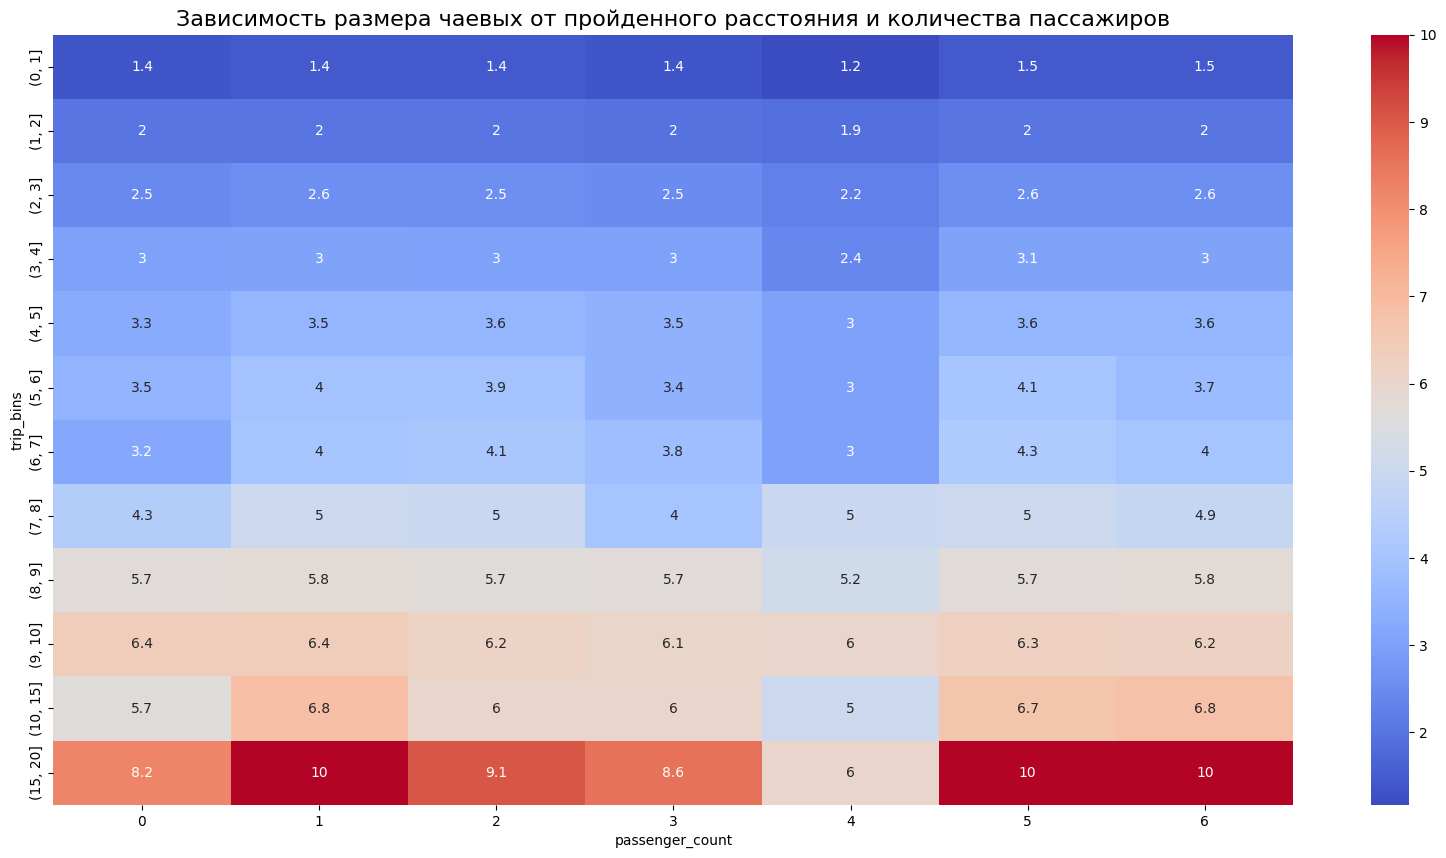

In [99]:
fig, axes = plt.subplots(figsize=(20, 10))
pivot_time = sns.heatmap(data=pivot, cmap="coolwarm", annot=True);
pivot_time.set_title('Зависимость размера чаевых от пройденного расстояния и количества пассажиров', fontsize=16);

Вывод:\
На основании тепловой карты можно увидеть, что с увеличением пройденного расстояния увеличивается размер чаевых при этом наибольший размер чаевых пассажиры склонных оставлять на дистанции 15-20 километров у всех груп пассажиров, кроме группы из 4х пассажиров

больше всего чаевых у группы:
1, 5, 6

меньше всего 4